# Value at Risk Assessment Model

### Import Packages


In [10]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [11]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('APPL')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

- APPL: No data found for this date range, symbol may be delisted


IndexError: single positional indexer is out-of-bounds

30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [ ]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4 week treasury bill rate)
rfr_MSFT = 0.02 

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [12]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_MSFT = 21/252 

(array([  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   2.,   3.,
          0.,   1.,   3.,   0.,   3.,   4.,   8.,   6.,  11.,   7.,   7.,
         10.,  12.,  19.,  24.,  35.,  32.,  24.,  35.,  44.,  44.,  61.,
         48.,  56.,  60.,  81.,  78.,  89.,  97.,  91., 113., 112., 114.,
        126., 111., 129., 131., 129., 122., 137., 162., 147., 130., 139.,
        143., 143., 116., 133., 138., 126., 117., 109., 124., 102.,  91.,
         88.,  73.,  89.,  64.,  66.,  60.,  45.,  46.,  43.,  43.,  44.,
         25.,  28.,  21.,  13.,  19.,  18.,  13.,   9.,  11.,   9.,   9.,
          4.,   5.,   1.,   1.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,
          3.]),
 array([-3.8122946 , -3.73985242, -3.66741025, -3.59496807, -3.52252589,
        -3.45008371, -3.37764153, -3.30519935, -3.23275718, -3.160315  ,
        -3.08787282, -3.01543064, -2.94298846, -2.87054629, -2.79810411,
        -2.72566193, -2.65321975, -2.58077757, -2.50833539, -2.43589322,
        -2.36345104, -2.29

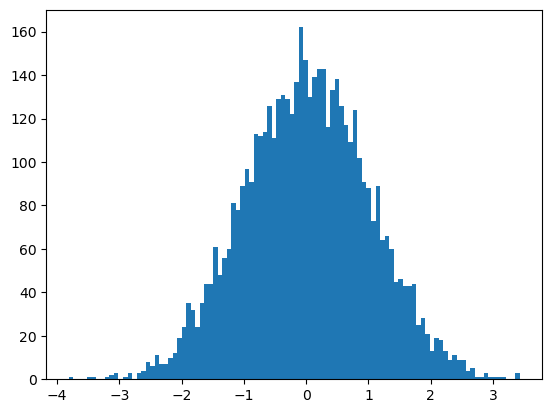

In [13]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [14]:
print(np.mean(sample))
print(np.std(sample))

0.013085735902118418
1.0063708061798877


In [15]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [16]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level is : $-19,873
VaR at 95% confidence level is : $-24,576
VaR at 99% confidence level is : $-33,982


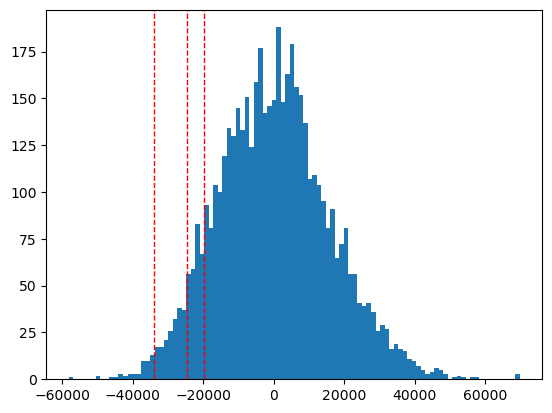

In [17]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level is : ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)